In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from numpy.random import multinomial

def bootstrap(series, n=1000, *args, **kwargs):
    return multinomial(series.sum(), series/series.sum(), n)

In [3]:
import numpy as np

from lint.models import Bucket

def plot_bootstrap(token):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))

    plt.figure(figsize=(10,10))

    plt.plot(bs.mean(0))

    plt.fill_between(
        range(100),
        bs.mean(0) + 2*bs.std(0),
        bs.mean(0) - 2*bs.std(0),
        color='black',
        alpha=0.1,
    )
    
    plt.plot(series)
    
    zscores = np.array([
        abs(mean-observed)/std
        for mean, std, observed in zip(bs.mean(0), bs.std(0), series)
        if mean > 0
    ])

    print(token, zscores.mean())
    plt.show()

school 13.0739799418


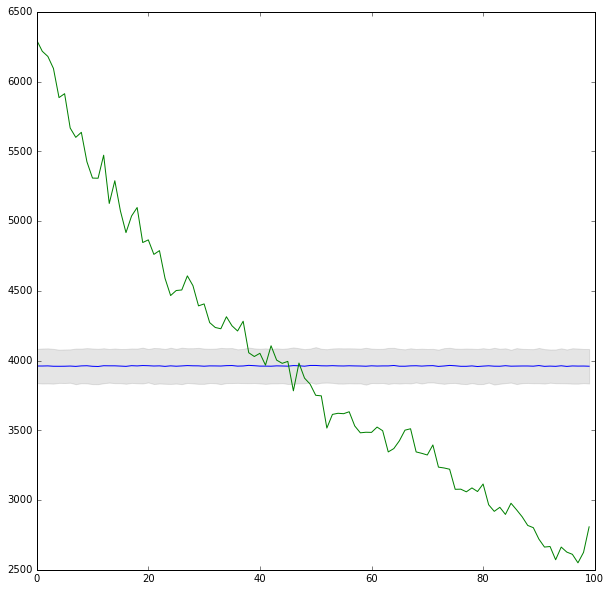

In [4]:
plot_bootstrap('school')

In [5]:
def mean_zscore(token):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))
    
    zscores = np.array([
        abs(mean-observed)/std
        for mean, std, observed in zip(bs.mean(0), bs.std(0), series)
        if mean > 0
    ])

    return zscores.mean()

In [6]:
from joblib import Memory

from lint.models import Bucket

mem = Memory('cache')

token_counts = mem.cache(Bucket.token_counts)

tokens = token_counts(10000)

In [7]:
data = []
for i, (token, count) in enumerate(tokens.items()):
    
    score = mean_zscore(token)
    
    data.append((token, count, score))
        
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


In [8]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'count', 'score'))

df.sort_values('score', ascending=False, inplace=True)

In [33]:
pd.set_option('display.max_rows', 1000)

df.head(200)

,token,count,score
6,a,45684348,22.270724
15,you,23542825,20.276764
25,-,13249381,18.997240
7,i,36733423,18.341353
8,“,36205440,17.752533
1,the,112947793,15.367254
179,young,1549495,14.487007
5,of,51452477,14.341807
232,years,1169616,13.876666
40,me,8766124,13.649019


a 22.4747996709


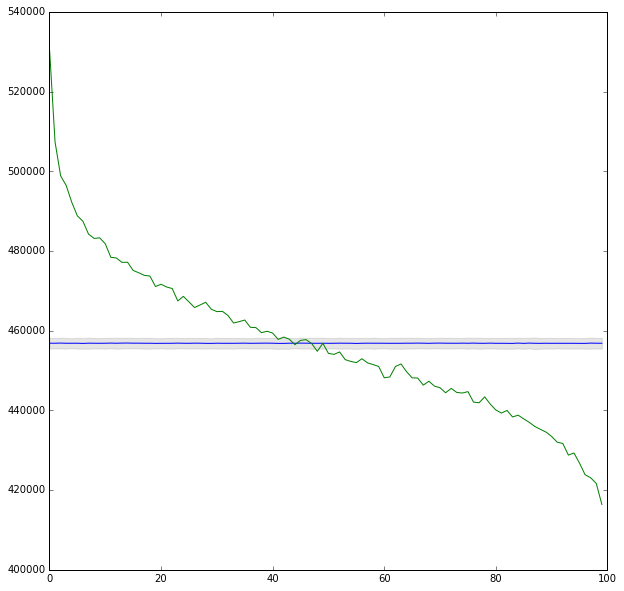

In [35]:
plot_bootstrap('a')